In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("MBA_ADMISSIONS.csv")

In [3]:
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,Female,Central Zone,Engineering,Single,Urban,prefered skills,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,Male,Central Zone,Engineering,Single,Urban,prefered skills,Marketing
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,Male,Central Zone,Engineering,Single,Semi Urban,prefered skills,LOS
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,Female,Central Zone,Engineering,Single,Urban,desired skills,Finance
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,Male,Central Zone,Commerce,Single,Semi Urban,prefered skills,Finance


In [4]:
df.isnull().sum()

pre_score                       0
Age_in_years                    0
Percentage_in_10_Class          0
Percentage_in_12_Class          0
Percentage_in_Under_Graduate    0
percentage_MBA                  0
post_score                      0
Gender                          0
STATE                           0
Previous_Degree                 0
Marital_status                  0
Place_you_belong_to             0
perceived#Job#Skill             0
Specialization                  0
dtype: int64

In [5]:
df.duplicated().sum()

321

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   pre_score                     473 non-null    float64
 1   Age_in_years                  473 non-null    int64  
 2   Percentage_in_10_Class        473 non-null    float64
 3   Percentage_in_12_Class        473 non-null    float64
 4   Percentage_in_Under_Graduate  473 non-null    float64
 5   percentage_MBA                473 non-null    float64
 6   post_score                    473 non-null    float64
 7   Gender                        473 non-null    object 
 8   STATE                         473 non-null    object 
 9   Previous_Degree               473 non-null    object 
 10  Marital_status                473 non-null    object 
 11  Place_you_belong_to           473 non-null    object 
 12  perceived#Job#Skill           473 non-null    object 
 13  Speci

In [7]:
ls = ["Gender", "STATE", "Previous_Degree", "Marital_status", "Place_you_belong_to", "perceived#Job#Skill", "Specialization"]

In [8]:
for x in ls:
    lb = LabelEncoder()
    df[x] = lb.fit_transform(df[x])
df

,pre_score,Age_in_years,Percentage_in_10_Class,Percentage_in_12_Class,Percentage_in_Under_Graduate,percentage_MBA,post_score,Gender,STATE,Previous_Degree,Marital_status,Place_you_belong_to,perceived#Job#Skill,Specialization
0,75.000000,22,71.0,74.8,72.00,61.00,83.333333,1,0,2,1,2,1,3
1,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,0,2,1,1,1,2
2,76.666667,26,93.2,83.8,77.00,74.97,75.000000,0,0,2,1,2,0,0
3,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,0,1,1,1,1,0
4,71.666667,24,79.8,61.6,60.33,69.28,76.666667,0,0,2,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,71.666667,22,95.0,78.6,75.43,68.54,88.333333,1,0,2,1,2,1,3
469,71.666667,25,77.6,82.6,76.90,66.85,76.666667,1,0,2,1,1,1,2
470,76.666667,26,93.2,83.8,77.00,74.97,75.000000,0,0,2,1,2,0,0
471,66.666667,22,91.2,80.0,67.00,68.30,60.000000,1,0,1,1,1,1,0


<Axes: >

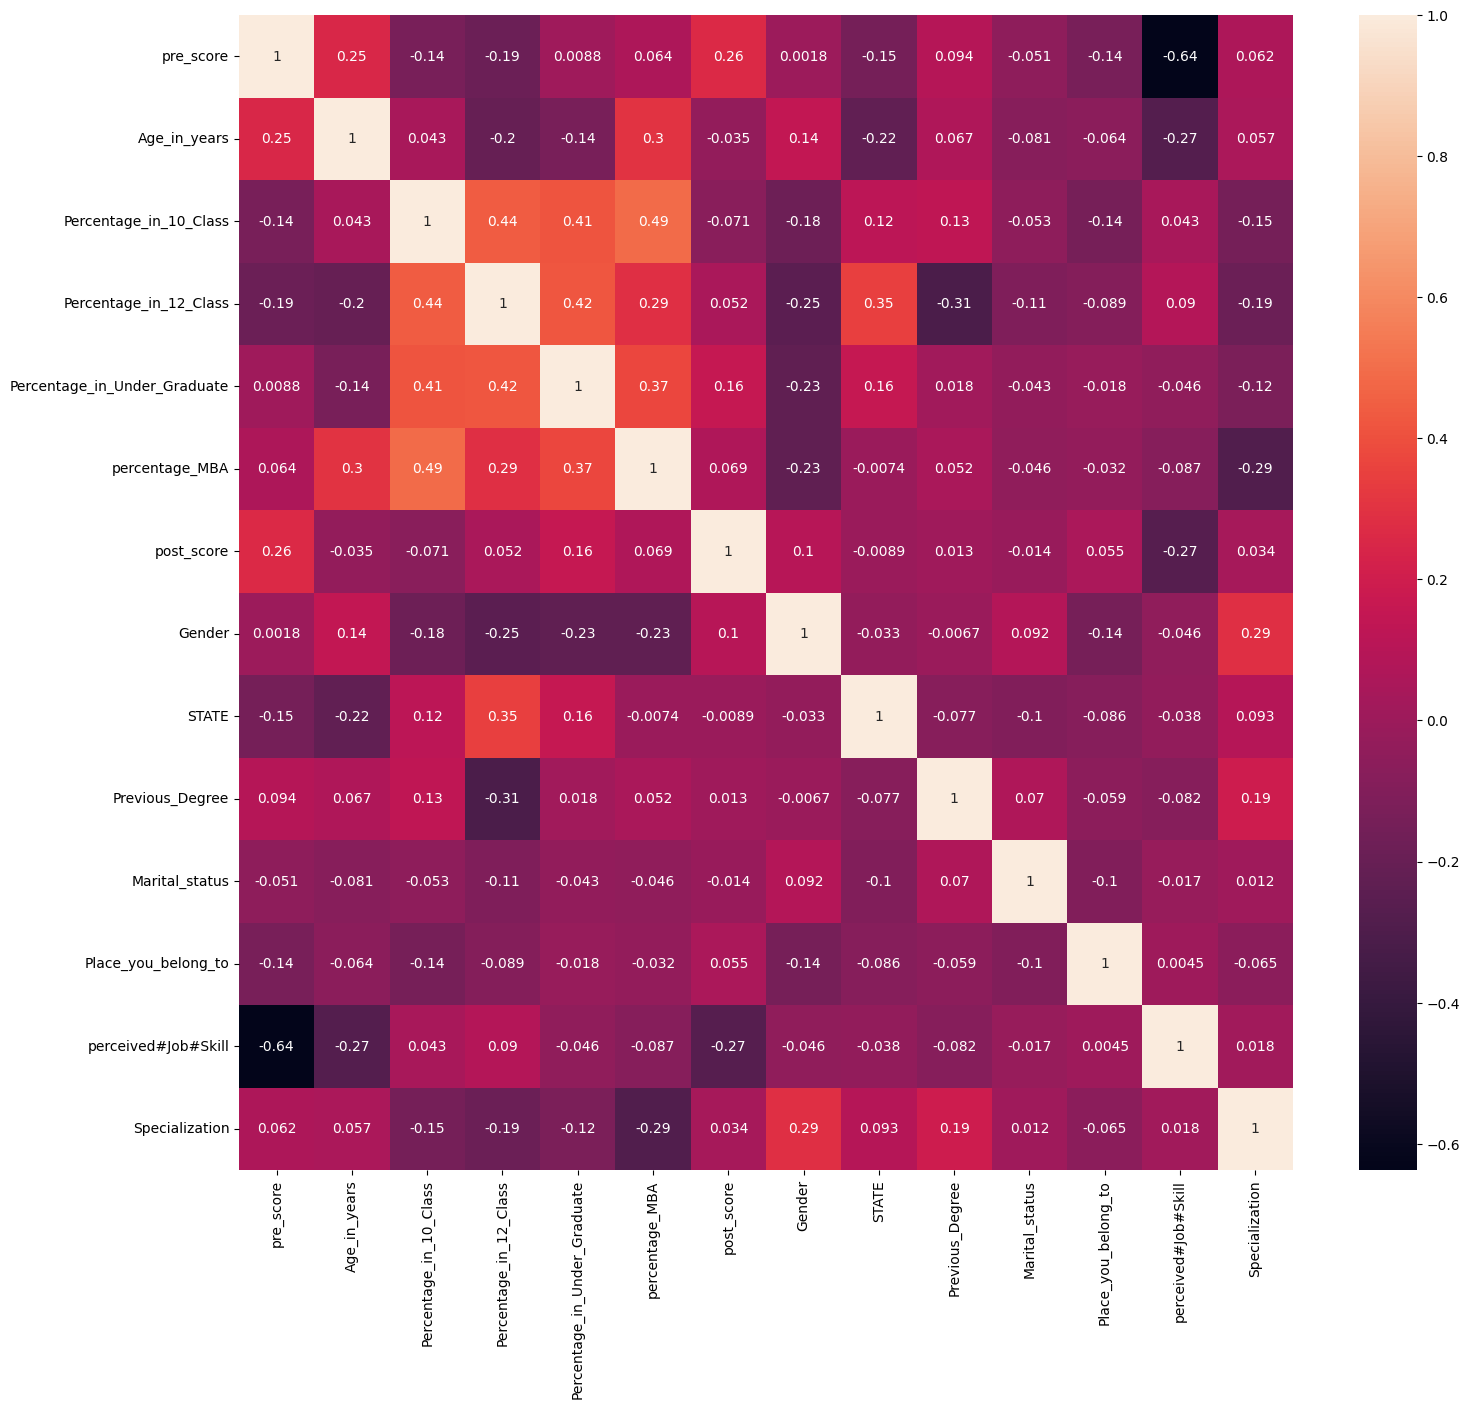

In [9]:
plt.figure(figsize = (17, 15))
sns.heatmap(df.corr(), annot = True)

In [10]:
x = df.drop("percentage_MBA", axis = 1)
y = df["percentage_MBA"]

Selected Features:
['Percentage_in_Under_Graduate', 'Percentage_in_10_Class', 'Percentage_in_12_Class', 'post_score', 'pre_score', 'Age_in_years', 'STATE']


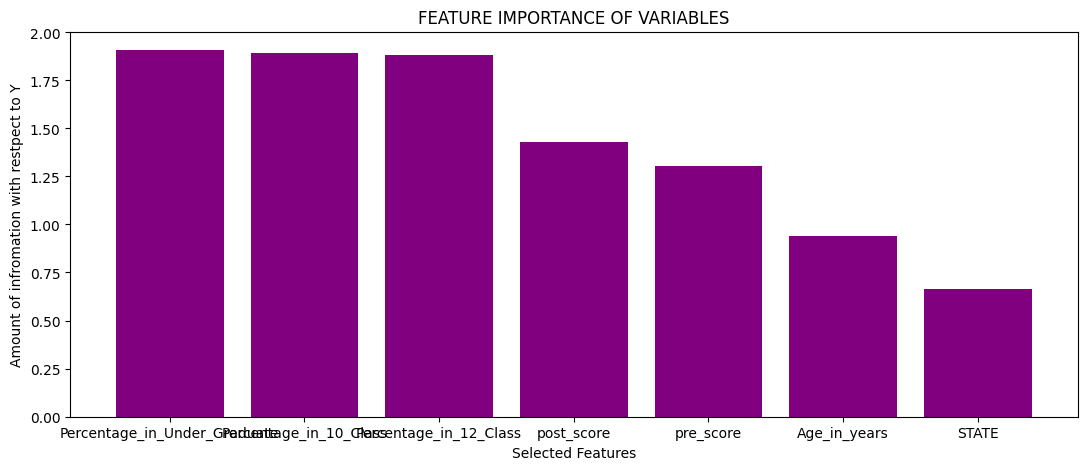

In [11]:
from sklearn.feature_selection import SelectKBest,mutual_info_regression,f_regression
import numpy as np
import matplotlib.pyplot as plt
k = 7
selector = SelectKBest(score_func=mutual_info_regression, k=k)
x_selected = selector.fit_transform(x, y)
selected_indices = np.argsort(selector.scores_)[::-1][:k]
selected_features = list(x.columns[selected_indices])

# Print the selected features
print("Selected Features:")
print(selected_features)
plt.figure(figsize=(13,5))
plt.bar(selected_features,selector.scores_[selected_indices[range(k)]],color='purple')
#plt.plot(selected_features,selector.scores_[selected_indices[range(k)]],color='red')
plt.xlabel('Selected Features')
plt.ylabel('Amount of infromation with restpect to Y')
plt.title('FEATURE IMPORTANCE OF VARIABLES')
plt.show()

In [12]:
x = df[['Percentage_in_10_Class', 'Percentage_in_Under_Graduate', 'Percentage_in_12_Class', 'post_score', 'pre_score', 'Age_in_years', 'STATE']]

In [13]:
x

,Percentage_in_10_Class,Percentage_in_Under_Graduate,Percentage_in_12_Class,post_score,pre_score,Age_in_years,STATE
0,71.0,72.00,74.8,83.333333,75.000000,22,0
1,77.6,76.90,82.6,76.666667,71.666667,25,0
2,93.2,77.00,83.8,75.000000,76.666667,26,0
3,91.2,67.00,80.0,60.000000,66.666667,22,0
4,79.8,60.33,61.6,76.666667,71.666667,24,0
...,...,...,...,...,...,...,...
468,95.0,75.43,78.6,88.333333,71.666667,22,0
469,77.6,76.90,82.6,76.666667,71.666667,25,0
470,93.2,77.00,83.8,75.000000,76.666667,26,0
471,91.2,67.00,80.0,60.000000,66.666667,22,0


In [14]:
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size = 0.15)

## Random Forest Model

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)
print("rsquared value:", r2_score(rf_pred,y_test))
print("mse value:", mean_squared_error(rf_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(rf_pred,y_test)))
print("mae value:", mean_absolute_error(rf_pred,y_test))

rsquared value: 0.8581094722847681
mse value: 1.4743063334859046
rmse value: 1.2142101685811664
mae value: 0.562176760563384


In [17]:
y.mean()

67.87416490486258

## XG BOOST  MODEL

In [18]:
from xgboost import XGBRegressor 

In [19]:
xg_model = XGBRegressor()
xg_model.fit(x_train,y_train)
xg_pred = xg_model.predict(x_test)
print("rsquared value:", r2_score(xg_pred,y_test))
print("mse value:", mean_squared_error(xg_pred,y_test))
print("rmse value:", np.sqrt(mean_squared_error(xg_pred,y_test)))
print("mae value:", mean_absolute_error(xg_pred,y_test))

rsquared value: 0.9447472813938818
mse value: 0.7357084128887329
rmse value: 0.8577344652564294
mae value: 0.1631098766058263
